In [267]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt


In [313]:
def sine_wave(frequency,time,sampling_rate):
    num_samples=sampling_rate
    sine_wave = time*[np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]
    return sine_wave   
    

In [269]:
def wav_creator(frequency,file_name,time,sampling_rate):
    sw=sine_wave(frequency,time,sampling_rate)
    amplitude=16000
    nframes=time*sampling_rate
    comptype="NONE"
    compname="not compressed"
    nchannels=1
    sampwidth=2
    wav_file=wave.open(file_name, 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
    for s in sw:
       wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [270]:
wav_creator(1000,"1000.wav",3,48000)

In [271]:
s_440=sine_wave(330,1,48000)

In [272]:
s_880=sine_wave(730,1,48000)

In [273]:
combinado=3*(s_440+s_880)

In [274]:
def wave_creator(file_name,tom):
    amplitude=16000
    nframes=tom.count(0)*48000
    comptype="NONE"
    compname="not compressed"
    nchannels=1
    sampwidth=2
    wav_file=wave.open(file_name, 'w')
    wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))
    for s in tom:
        wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [275]:
wave_creator("Combinado.wav",combinado)

In [350]:
s_1=sine_wave(1,1,48000)

In [277]:
test=3*([s_1[i]*s_440[i] for i in range(48000)]+[s_1[i]*s_880[i] for i in range(48000)])

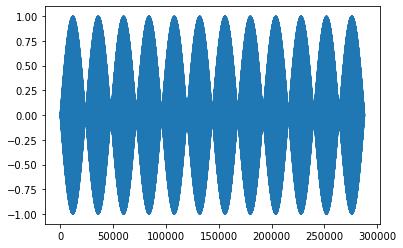

In [278]:
plt.plot(test)

In [279]:
wave_creator("test.wav",combinado)

In [393]:
var_f = [i/24000 for i in range(48000)]
var_r = [(48000-i)/24000 for i in range(48000)]
variacao=var_f+var_r

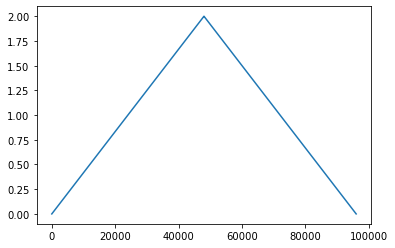

In [394]:
plt.plot(variacao)

In [400]:
sirene = 10*[np.sin(2 * np.pi*(1+var_f[x-1])*440*x/sampling_rate) + np.sin(2 * np.pi*(1+var_r[x-1])*220*x/sampling_rate) for x in range(48000)]
    

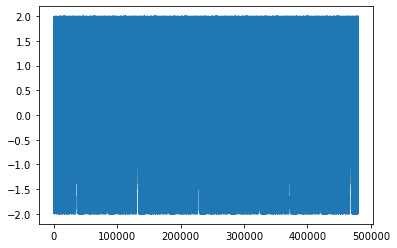

In [401]:
plt.plot(sirene)

In [402]:
wave_creator("sirene.wav",sirene)